In [1]:
import numpy as np 
import matplotlib.pyplot as plt 

import matplotlib as mpl

"""
Plot
"""
mpl.rcParams['font.size'] = 14

# J for unknown 
### How does $^{39}$K(n, $\alpha$)$^{36}$Cl affect J
#### Dependences
* (1) Neutron Fluence
* (2) Inversely proportional to the age 
* (3) Independent of K/Ca
* If Standard and unknown are the same
    * J = (exp($\lambda$ $\times$ age) - 1)/(F$_{s}$)
    * Age = $\frac{1}{\lambda}$ $\times$ ((F $\times$ J)  + 1)
    * The magnitude of the change in J will be the same 
    * The age will be the same
    

In [2]:
"""
Model Results 
"""
Ar39_k = 7.1e-12 # mol/g 10% K2O
Ar36_n = 1.2e-5 * Ar39_k# relative to 39ArK production

"""
Ar40 
"""
yy = np.linspace(0.13, 300, 1000)
Ar40_rad_1 = Ar39_k * yy
Ar40_atm = 0.01* Ar40_rad_1
Ar40_excess = (295.5*Ar36_n)

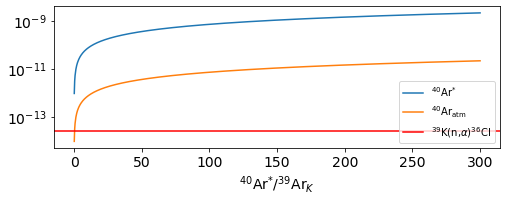

In [3]:
fig, ax = plt.subplots(1,1, figsize = (8,2.6))
ax.plot(yy, Ar40_rad_1, 
       label = '$^{40}$Ar$^{*}$')
ax.plot(yy, Ar40_atm, 
       label = r'$^{40}$Ar$_{\rm atm}$')
plt.axhline(295.5*Ar36_n, 
           label = r'$^{39}$K(n,$\alpha$)$^{36}$Cl', color = 'red')
plt.yscale('log')
plt.xlabel('$^{40}$Ar$^{*}$/$^{39}$Ar$_{K}$')
plt.legend(fontsize = 10)
#ax.plot(yy, Ar40_excess)

In [4]:
qq = (Ar39_k* yy) + 295.5*Ar36_n

In [5]:
F = np.linspace(0.1, 300, 1000)

In [6]:
Corr_scalar = (qq/Ar40_rad_1)

In [7]:
F2 = F * Corr_scalar

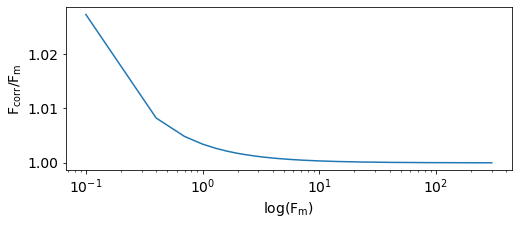

In [8]:
fig, ax = plt.subplots(1,1, figsize= (8,3))
#plt.plot(F, F, ls = '--')
plt.xlabel(r'log(F$_{\rm m}$)')
plt.ylabel(r'F$_{\rm corr}$/F$_{\rm m}$')

#plt.plot(F, F2)
plt.plot(F, F2/F)
plt.xscale('log')
#plt.yscale('log')
#plt.locat

In [9]:
"""
Decaying Exponential Function  
"""
def monoExp(x, m, t, b):
    return m * np.exp(-t * x) + b

In [10]:
from scipy.optimize import curve_fit
p0 = (2, 1, 10)
params, cov = curve_fit(monoExp, np.log(F), F2/F, 
                                       p0)

In [11]:
m,t, b = params

In [12]:
x_fit = np.log(np.linspace(0.1, 400, 1000))
y_fitting = monoExp(x_fit, m, t, b)

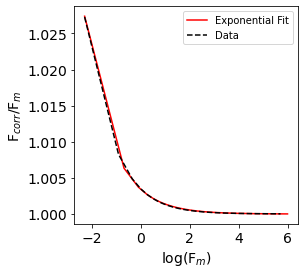

In [13]:
fig, ax = plt.subplots(1,1, figsize= (4,4))
plt.xlabel('log(F$_{m}$)')
plt.ylabel('F$_{corr}$/F$_{m}$')

plt.plot(x_fit, y_fitting, label = 'Exponential Fit', 
        color = 'r')
plt.plot(np.log(F), F2/F, label = 'Data', 
        color = 'k', ls = '--')
plt.legend(fontsize =10)
#plt.xscale('log')
#plt.yscale('log')

In [14]:
def age_correction_stan_un(Age_stan):
    lamb = 5.463e-10
    J = 0.01
    """
    Part 1 (F value correction for both standard
    and unknown)
    """
    F_stan = (np.exp(lamb*Age_stan) - 1)
    
    F_stan_corr = monoExp((np.exp(lamb*Age_stan) - 1), m, t, b) * (np.exp(lamb*Age_stan) - 1)

    F_un = np.linspace(0.00001, 10, 1000)
    
    F_un_corr = monoExp(F_un, m, t, b) * F_un
    
    R_un_stan = F_un_corr/F_stan_corr
    
    R_un_stan_uncorr = F_un/F_stan
    
    age_corr = (1/lamb) * np.log((np.exp(lamb*Age_stan) - 1) * R_un_stan + 1)
    age_uncorr = (1/lamb) * np.log((np.exp(lamb*Age_stan) - 1) *R_un_stan_uncorr + 1)
    return age_corr, age_uncorr

In [15]:
x, y = age_correction_stan_un(28.201e6)


In [16]:
x_fc, y_fc = age_correction_stan_un(28.201e6)
x_ac, y_ac = age_correction_stan_un(1.185e6)
x_ga1550, y_ga1550 = age_correction_stan_un(99.8e6)
x_hb3gr, y_hb3gr = age_correction_stan_un(1073.6e6)


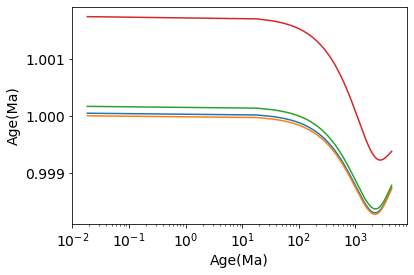

In [17]:
#plt.plot(y/1e6,x/1e6)
#plt.plot(y/1e6,y/1e6)

plt.plot(y_fc/1e6, x_fc/y_fc)
plt.plot(y_ac/1e6, x_ac/y_ac)
plt.plot(y_ga1550/1e6, x_ga1550/y_ga1550)
plt.plot(y_hb3gr/1e6, x_hb3gr/y_hb3gr)

plt.xlabel('Age(Ma)')
plt.ylabel('Age(Ma)')
plt.xscale('log')
#plt.yscale('log')

In [18]:
lamb = 5.543e-10
F_stan_corr_fcs = monoExp((np.exp(lamb*28.201e6) - 1), m, t, b) * (np.exp(lamb*28.201e6) - 1)
F_stan_corr_acs = monoExp((np.exp(lamb*1.185e6) - 1), m, t, b) * (np.exp(lamb*1.185e6) - 1)
F_stan_corr_ga1550 = monoExp((np.exp(lamb*99.8e6) - 1), m, t, b) * (np.exp(lamb*99.8e6) - 1)
F_stan_corr_hgbr = monoExp((np.exp(lamb*1073.6e6) - 1), m, t, b) * (np.exp(lamb*1073.6e6) - 1)


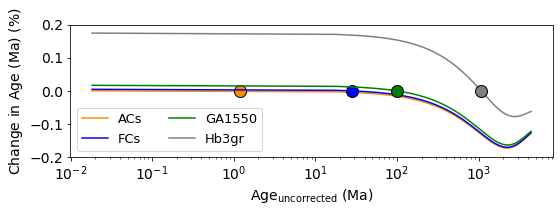

In [20]:
fig, ax = plt.subplots(1,1, figsize = (8,3))

plt.plot(y_ac/1e6,(x_ac/y_ac)*100 - 100, 
        label = 'ACs', 
        color = 'darkorange')
plt.plot(1.185, 0, 'o', markersize = 12, 
        markeredgecolor = 'k', 
        color = 'darkorange')

plt.plot(y_fc/1e6,(x_fc/y_fc)*100 - 100, 
        label = 'FCs', 
        color = 'blue')
plt.plot(28.201, 0, 'o', markersize = 12, 
        markeredgecolor = 'k', 
        color = 'blue')


plt.plot(y_ga1550/1e6,(x_ga1550/y_ga1550)*100 - 100, 
        label = 'GA1550', 
        color = 'green')
plt.plot(99.8, 0, 'o', markersize = 12, 
        markeredgecolor = 'k', 
        color= 'green')


plt.plot(y_hb3gr/1e6,(x_hb3gr/y_hb3gr)*100 - 100, 
        label = 'Hb3gr', 
        color= 'grey')
plt.plot(1073.6, 0, 'o', markersize = 12, 
        markeredgecolor = 'k', 
        color= 'grey')

#plt.axhline(1)
plt.legend(fontsize = 13, ncol = 2)
plt.xlabel(r'Age$_{\rm uncorrected}$ (Ma)')
plt.ylabel('Change in Age (Ma) ($\%$)')
plt.xscale('log')
plt.locator_params(axis = 'y', nbins = 7)
plt.ylim(-0.2, 0.2)
plt.tight_layout()
